In [1]:
import pandas as pd
import numpy as np

In [5]:
kw=pd.read_excel('Hypothesis Testing.xlsx',sheet_name='kw2').iloc[:,0:3]
kw

,s1,s2,s3
0,18,12.0,12.0
1,27,17.0,18.0
2,29,22.0,19.0
3,33,30.0,28.0
4,41,37.0,33.0
5,52,NaN,41.0
6,75,NaN,NaN


Kruskal-Wallis Test

- The problem objective is to compare two or more populations.
- The data are either ordinal or interval, but non-normal.
- The samples are independent.

In [6]:
#H0: The median/location of all the K populations are same.
#H1: The median/location of at least two populations are different.

In [8]:
from scipy.stats import kruskal
kruskal(kw['s1'],kw['s2'].dropna(),kw['s3'].dropna())

KruskalResult(statistic=3.045487293362945, pvalue=0.21811264124453503)

In [32]:
df=pd.read_excel('Hypothesis Testing.xlsx',sheet_name='karl').iloc[:,0:2]
df

,cost,tools
0,23.80,7
1,11.89,3
2,15.98,2
3,26.11,5
4,31.79,8
5,39.93,11
6,12.27,5
7,40.06,15
8,21.38,3
9,18.65,6


<AxesSubplot:xlabel='tools', ylabel='cost'>

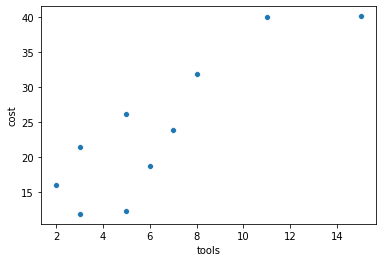

In [10]:
#Scatter plot
import seaborn as sb
sb.scatterplot(df['tools'],df['cost'])

In [33]:
df.columns=['y','x']

In [34]:
#Covariance
df['xy']=df['x']*df['y']
df

,y,x,xy
0,23.80,7,166.60
1,11.89,3,35.67
2,15.98,2,31.96
3,26.11,5,130.55
4,31.79,8,254.32
5,39.93,11,439.23
6,12.27,5,61.35
7,40.06,15,600.90
8,21.38,3,64.14
9,18.65,6,111.90


In [35]:
total=df.sum()
total

y      241.86
x       65.00
xy    1896.62
dtype: float64

In [36]:
cov_xy=((1/9)*(total[2]-(total[1]*total[0]/10)))
cov_xy

36.05888888888888

In [37]:
#Karl pearson's correlation coefficient
r=cov_xy/(df['x'].std() * df['y'].std())
r

0.8710762678126167

In [38]:
df['x'].corr(df['y'])

0.8710762678126167

In [39]:
df.corr()

,y,x,xy
y,1.000000,0.871076,0.922913
x,0.871076,1.000000,0.977249
xy,0.922913,0.977249,1.000000


In [23]:
#Spearman rank correlation
rank=pd.read_excel('Hypothesis Testing.xlsx',sheet_name='rank')
rank

,Test1,Test2
0,20,32
1,30,32
2,22,48
3,28,36
4,32,44
5,40,48
6,20,28
7,16,20
8,14,24
9,18,28


In [24]:
rank['a']=rank['Test1'].rank()
rank['b']=rank['Test2'].rank()
rank

,Test1,Test2,a,b
0,20,32,4.5,5.5
1,30,32,8.0,5.5
2,22,48,6.0,9.5
3,28,36,7.0,7.0
4,32,44,9.0,8.0
5,40,48,10.0,9.5
6,20,28,4.5,3.5
7,16,20,2.0,1.0
8,14,24,1.0,2.0
9,18,28,3.0,3.5


In [25]:
#Cov_ab
cov_ab=rank['a'].cov(rank['b'])
cov_ab

7.722222222222221

In [26]:
cov_ab/(rank['a'].std()*rank['b'].std())

0.8527767846890928

In [27]:
rank['Test1'].corr(rank['Test2'],method='spearman')

0.8527767846890928

In [28]:
#Exercise
#Solve the question given in sheet kw1.
#Find karl pearson correlation coefficients on Test scores.
rank['Test1'].corr(rank['Test2'])

0.7581044494986093

In [30]:
#Predict cost of electricity by number of tools manufactured

In [40]:
#b1=cov_xy/var_x
var_x=df['x'].var()

In [41]:
b1=cov_xy/var_x
b1

2.2458823529411758

In [42]:
#b0=y'-b1x'
df.mean()

y      24.186
x       6.500
xy    189.662
dtype: float64

In [43]:
b0=df['y'].mean()-b1*df['x'].mean()
b0

9.587764705882357

In [ ]:
#Least square line y=b0+b1*x
#y=9.59+2.25*x

In [45]:
#Coefficient of Determination R square: r**2
#Measure the amount of variation in (Cost/DV) that is explained by the variation in (Tools/IDV).
r**2

0.7587738643463575

In [ ]:
#76% of variation in Cost is explained by the variation in Tools.

In [ ]:
#y=f(x)=9.59+2.25*x
#cost=f(tools)=9.59+2.25*tools
#cost=f(tools)

Hypothesis
- H0: b1=0 (No impact of tools)
- H1: b1 not zero (there is an impact)

In [46]:
from statsmodels.formula.api import ols
model=ols('y~x',df).fit()

In [47]:
model.summary()

c:\users\admin\anaconda37\envs\ml\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     25.16
Date:                Tue, 08 Dec 2020   Prob (F-statistic):            0.00103
Time:                        15:48:54   Log-Likelihood:                -29.904
No. Observations:                  10   AIC:                             63.81
Df Residuals:                       8   BIC:                             64.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.5878      3.371      2.844      0.022       1.814      17.362
x              2.2459      0.448      5.016      0.001       1.213       3.278
==============================================================================
Omnibus:                        1.705   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.426   Jarque-Bera (JB):                0.847
Skew:                          -0.264   Prob(JB):                        0.655
Kurtosis:                       1.676   Cond. No.                         15.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
#Beta coefficients
model.params

Intercept    9.587765
x            2.245882
dtype: float64

In [49]:
#How to get predicted outcome
model.predict()

array([25.30894118, 16.32541176, 14.07952941, 20.81717647, 27.55482353,
       34.29247059, 20.81717647, 43.276     , 16.32541176, 23.06305882])

In [54]:
df['y']

0    23.80
1    11.89
2    15.98
3    26.11
4    31.79
5    39.93
6    12.27
7    40.06
8    21.38
9    18.65
Name: y, dtype: float64

In [51]:
pred=model.predict(df['x'])
pred

0    25.308941
1    16.325412
2    14.079529
3    20.817176
4    27.554824
5    34.292471
6    20.817176
7    43.276000
8    16.325412
9    23.063059
dtype: float64

In [52]:
#residual=Actual-predicted
df['y']-pred

0   -1.508941
1   -4.435412
2    1.900471
3    5.292824
4    4.235176
5    5.637529
6   -8.547176
7   -3.216000
8    5.054588
9   -4.413059
dtype: float64

In [53]:
model.resid

0   -1.508941
1   -4.435412
2    1.900471
3    5.292824
4    4.235176
5    5.637529
6   -8.547176
7   -3.216000
8    5.054588
9   -4.413059
dtype: float64